In [13]:
%%capture
!pip install mlflow
!pip install dagshub

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import joblib
import mlflow
import mlflow.sklearn
import dagshub

In [39]:
# Initialize your experiment
dagshub.init(repo_owner='Niticodersh', repo_name='Mlops_assignment', mlflow=True)
mlflow.set_experiment("Major Examination")

remote_server_uri = 'https://dagshub.com/Niticodersh/Mlops_assignment.mlflow'
mlflow.set_registry_uri(remote_server_uri)

Initialized MLflow to track repo "Niticodersh/Mlops_assignment"

Repository Niticodersh/Mlops_assignment initialized!

In [40]:
data = load_iris()

In [41]:
class IrisDataProcessor:
    def __init__(self, test_size=0.2, random_state=42):
        # Load iris dataset
        self.data = load_iris()
        self.df = None
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.test_size = test_size
        self.random_state = random_state
        self.scaler = StandardScaler()

    def prepare_data(self):
        # Convert to pandas DataFrame
        self.df = pd.DataFrame(data=np.c_[self.data['data'], self.data['target']],
                               columns=self.data['feature_names'] + ['target'])
        # Split dataset
        X = self.df.drop(columns=['target'])
        y = self.df['target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)
        # Scale features
        self.X_train = self.scaler.fit_transform(X_train)
        self.X_test = self.scaler.transform(X_test)
        self.y_train, self.y_test = y_train, y_test
        return self.X_train, self.X_test, self.y_train, self.y_test

    def get_feature_stats(self):
        # Statistical summary of the features
        return self.df.describe()

In [42]:
processor = IrisDataProcessor()
X_train, X_test, y_train, y_test = processor.prepare_data()
processor.get_feature_stats()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [44]:
class IrisExperiment:
    def __init__(self, data_processor):
        self.data_processor = data_processor
        self.models = {
            'Logistic Regression': LogisticRegression(),
            'Random Forest': RandomForestClassifier()
        }

    def run_experiment(self):
        # Track each model's performance
        X_train, X_test, y_train, y_test = self.data_processor.X_train, self.data_processor.X_test, self.data_processor.y_train, self.data_processor.y_test
        for model_name, model in self.models.items():
            # Start MLflow run
            with mlflow.start_run(run_name=model_name):
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                # Log metrics
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted')
                recall = recall_score(y_test, y_pred, average='weighted')

                mlflow.log_param("model_name", model_name)
                mlflow.sklearn.log_model(model, "model")
                mlflow.log_metric("accuracy", accuracy)
                mlflow.log_metric("precision", precision)
                mlflow.log_metric("recall", recall)

                # Log model
                mlflow.sklearn.log_model(model, model_name)

    def log_results(self):
        # Records all model metrics with MLflow
        print("Experiments have been logged to MLflow.")

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, num_classes):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, num_classes)

  def forward(self, x):
    # return torch.softmax(self.linear(x), dim=1)
    return self.linear(x)

model = LogisticRegressionModel(X_train.shape[1], 3)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
plot_train_losses = []
plot_test_losses = []
best_test_loss = float('inf')
epochs = 100

# Log hyperparameters
mlflow.log_param("batch_size", batch_size)
mlflow.log_param("epochs", epochs)
mlflow.log_param("learning_rate", 0.01)
mlflow.log_param("optimizer", "SGD")
mlflow.log_param("loss_function", "CrossEntropyLoss")
print()

In [ ]:
for epoch in range(epochs):
  model.train()
  running_train_loss = 0.0
  for batch_idx, (inputs, labels) in enumerate(train_loader):
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_train_loss += loss.item()

  train_loss = running_train_loss/len(train_loader)
  plot_train_losses.append(train_loss)

  model.eval()
  with torch.no_grad():
    running_test_loss = 0.0
    for batch_idx, (inputs, labels) in enumerate(test_loader):
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      running_test_loss += loss.item()

  test_loss = running_test_loss/len(test_loader)
  plot_test_losses.append(test_loss)

  # Log losses for each epoch
  mlflow.log_metric("train_loss", train_loss, step=epoch)
  mlflow.log_metric("test_loss", test_loss, step=epoch)

  if test_loss < best_test_loss:
    best_test_loss = test_loss
    torch.save(model.state_dict(), 'best_model.pth')

  if epoch%10 == 0:
    print(f'Epoch [{epoch}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [0/100], Train Loss: 2.2017, Test Loss: 1.9907
Epoch [10/100], Train Loss: 0.6952, Test Loss: 0.6927
Epoch [20/100], Train Loss: 0.4590, Test Loss: 0.4644
Epoch [30/100], Train Loss: 0.3592, Test Loss: 0.3683
Epoch [40/100], Train Loss: 0.3030, Test Loss: 0.3147
Epoch [50/100], Train Loss: 0.2700, Test Loss: 0.2802
Epoch [60/100], Train Loss: 0.2421, Test Loss: 0.2558
Epoch [70/100], Train Loss: 0.2259, Test Loss: 0.2376
Epoch [80/100], Train Loss: 0.2070, Test Loss: 0.2232
Epoch [90/100], Train Loss: 0.1935, Test Loss: 0.2117


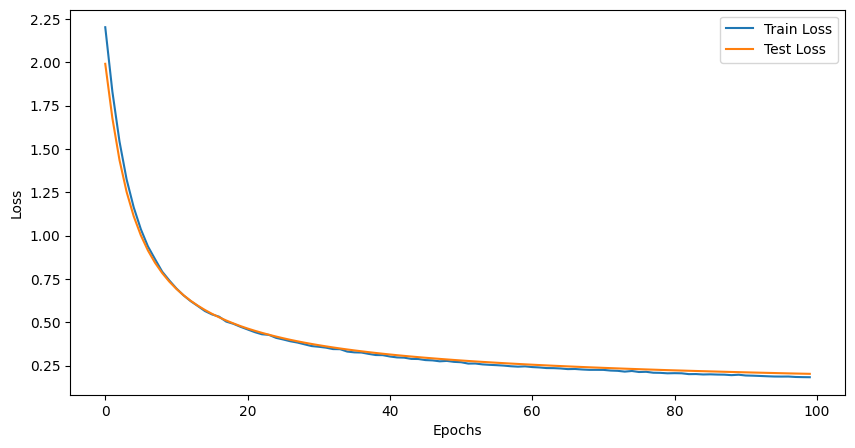

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(plot_train_losses, label='Train Loss')
plt.plot(plot_test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')
mlflow.log_artifact('loss_plot.png')
plt.show()

In [ ]:
def dynamic_quantize_model(model):
    quantized_model = torch.quantization.quantize_dynamic(
        model, {nn.Linear}, dtype=torch.qint8
    )
    return quantized_model


In [ ]:
def test_model(model, test_loader):
  with torch.no_grad():
    test_outputs = torch.softmax(model(X_test_tensor), dim=1)
    _, predicted = torch.max(test_outputs, dim=1)
    accuracy = (predicted == y_test_tensor).sum().item()/len(y_test_tensor) * 100
  return accuracy

In [45]:
class IrisModelOptimizer:
    def __init__(self, experiment):
        self.experiment = experiment

    def quantize_model(self):
        # Model quantization: example using Logistic Regression model
        model = dynamic_quantize_model(model)
        mlflow.sklearn.log_model(model)
        print("Model has been quantized and logged to MLflow.")

    def run_tests(self):
        # Unit tests for models
        assert self.experiment.models['Logistic Regression'] is not None, "Logistic Regression model not found"
        assert self.experiment.models['Random Forest'] is not None, "Random Forest model not found"
        print("All tests passed.")

In [46]:
processor = IrisDataProcessor()
X_train, X_test, y_train, y_test = processor.prepare_data()

# Run experiments
experiment = IrisExperiment(processor)
experiment.run_experiment()

# Optimize and test
optimizer = IrisModelOptimizer(experiment)
optimizer.quantize_model()
optimizer.run_tests()

2024/11/12 07:10:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/12 07:10:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/12 07:10:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression at: https://dagshub.com/Niticodersh/Mlops_assignment.mlflow/#/experiments/4/runs/0106c08d29414216aff59da0f8b5f96a.
2024/11/12 07:10:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/Niticodersh/Mlops_assignment.mlflow/#/experiments/4.
2024/11/12 07:11:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/12 07:11:10 WARNING mlflow.mo

Model has been quantized and logged to MLflow.
All tests passed.
